# Algorytmy i Struktury Danych

#### Potrzebne importy

In [41]:
from matplotlib import pyplot as plt
from timeit import default_timer
import numpy as np
from math import inf

## Silnia

#### Naiwna implementacja rekurencyjna

In [2]:
def factorial1(n):
    if n == 0:
        return 1
    return n * factorial1(n - 1)

#### Dynamiczna implementacja ze słownikiem

In [3]:
def factorial2(n, memory={0:1}):
    if n in memory:
        return memory[n]
    memory[n] = n * factorial2(n - 1)
    return memory[n]

#### Implementacja przez pętlę

Zwróć uwagę, że `range(n)` to wartości $0\ldots(n-1)$, więc musimy je zwiększyć o 1.

In [4]:
def factorial3(n):
    x = 1.0
    for i in range(n):
        x *= i + 1.0
    return x

## Liczzby Fibonacciego

#### Naiwna implementacja rekurencyjna

Uwaga, bardzo szybko rośnie złożoność i może zadławić się dla $n \sim 40$

In [5]:
def Fib1(n):
    if n == 0 or n == 1:
        return n
    return Fib1(n - 1) + Fib1(n - 2)

#### Dynamiczna implementacja ze słownikiem

In [6]:
def fib(n, memory={0:0, 1:1}):
    if n in memory:
        return memory[n]
    else:
        memory[n] = fib(n - 1) + fib(n - 2)
        return memory[n]

#### Implementacja przez pętlę

In [7]:
def fib(n: int):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a+b
    return a

## Dziel i zwyciężaj

### Sortowanie

#### Select Sort

Złożoność czasowa $O(n^2)$

`np.argmin` zwróci nam indeks minimum licząc od `i`-tego elementu, dlatego dodajemy `i`.

In [8]:
def selectSort(L):
    for i in range(len(L)):
        j = np.argmin(L[i:]) + i
        L[i], L[j] = L[j], L[i]

#### Merge sorted lists

Złożoność czasowa $O(n)$

Na koniec albo `A` albo `B` jest pusta, więc `result + A + B` zwróci nam rezultat z resztą pozostałej listy na końcu.

In [9]:
def merge(A, B):
    result = []
    i, j = 0, 0
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            result.append(A[i])
            i += 1
        else:
            result.append(B[j])
            j += 1
    return result + A[i:] + B[j:]

#### Split in half

Złożoność czasowa $O(n)$

In [10]:
def splitInHalf(L):
    l = len(L) // 2
    return L[:l], L[l:]

#### Split by first element

Złożoność czasowa $O(n)$

In [11]:
def splitByFirst(L):
    first = L[0]
    A, B = [], []
    for element in L[1:]:
        if element < first:
            A.append(element)
        else:
            B.append(element)
    if len(A) == 0:
        A.append(first)
    else:
        B.append(first)
    return A, B

#### MergeSort

Złożoność czasowa $O(\log{n} \cdot (n + n)) \equiv O(n\log{n})$

In [12]:
def mergeSort(L):
    if len(L) > 1:
        A, B = splitInHalf(L)
        return merge(mergeSort(A), mergeSort(B))
    else:
        return L

#### QuickSort

Napisany naiwnie, normalnie powinien być in-place. Złożoność czasowa $O(n^2)$

In [13]:
def quickSort(L):
    if len(L) > 1:
        A, B = splitByFirst(L)
        return quickSort(A) + quickSort(B)
    else:
        return L

Alternatywne implementacje quick sort, delikatniej szybsze.

In [14]:
def quickSort2(a):
    if len(a) <= 1:
        return a
    else:
        q = a[0]
        l, m, r = [], [], []
        for elem in a:
            if elem < q:
                l.append(elem)
            elif elem > q:
                r.append(elem)
            else:
                m.append(elem)
        return quickSort2(l) + m + quickSort2(r)

In [15]:
def quickSort3(lst):
    if len(lst) <= 1:
        return lst
    mid = lst[len(lst) // 2]
    lewa = [x for x in lst if x < mid]
    middle = [x for x in lst if x == mid]
    prawa = [x for x in lst if x > mid]

    return quickSort3(lewa) + [middle] + quickSort3(prawa)

#### Porównanie

`sst` - select sort times - select sort sortuje in-place, co oznacza, że lista `l` będzie posortowana. Dlatego przygotowujemy oddzielnie `npl` (numpy list), którą rzutujemy na standardową listę pythonową dla każdego algorytmu do posortowania.

`mst` - merge sort times

`qst` - quick sort times

`pst` - python standard sort times - sorted jest funkcją leniwą, co oznacza, że zwraca nam jedynie przepis na sortowanie listy. Sama lista zostanie posortowana dopiero wtedy, gdy będziemy się odwoływali do jej elementów. Rzutowanie na `list` wystarcza do "zgorliwienia".

`nst` - numpy sort times

In [16]:
sst = []
mst = []
qst = []
qst2 = []
qst3 = []
pst = []
nst = []

ns = range(0,10000,1000)

for n in ns:
    npl = np.random.random(n)
    l = list(npl)
    start = default_timer()
    selectSort(l)
    sst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    mergeSort(l)
    mst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort(l)
    qst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort2(l)
    qst2.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort3(l)
    qst3.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    list(sorted(l))
    pst.append(default_timer() - start)

    start = default_timer()
    np.sort(npl)
    nst.append(default_timer() - start)


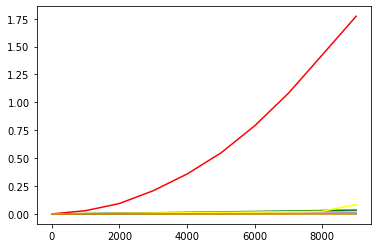

In [17]:
plt.plot(ns, sst, 'r')
plt.plot(ns, mst, 'g')
plt.plot(ns, qst, 'b')
plt.plot(ns, qst2, 'pink')
plt.plot(ns, qst3, 'yellow')
plt.plot(ns, pst, 'black')
plt.plot(ns, nst, 'orange')
plt.show()

### Szybkie potęgowanie

Złożoność czasowa $O(\log{n})$

In [27]:
def fastPower(a, n):
    result = 1
    while n > 0:
        if n % 2 == 1:
            result *= a
        n //= 2
        a *= a
    return result

## Szybki Fibonacci

$$\begin{pmatrix}a & b\\ c & d\end{pmatrix} \cdot \begin{pmatrix}e & f\\ g & h\end{pmatrix} = \begin{pmatrix}ae + bg & af + bh \\ ce + dg & cf + dh\end{pmatrix}$$

In [ ]:
def matMul(A, B):
    a, b, c, d = A
    e, f, g, h = B
    return a * e + b * g, a * f + b * h, c * e + d * g, c * f + d * h


#### Problem komiwojażera

Rozwiązanie zachłanne $O(n^3)$

`N` - liczba miast

`towns` - losujemy współrzędne dla miast

`best_cost` - najlepszy jak dotąd koszt (suma kwadratów odległości) ścieżki. Domyślnie $\infty$ by dowolna ścieżka była lepsza od domyślnej.

`best_path` - najlepsza dotąd znaleziona ścieżka

Dla każdego miasta rozpatrujemy ścieżkę rozpoczynającą się z niego. Mając miasto znajdźmy mu najbliższe, to jest takie, że kwadrat odległości $(x_1 - x_2)^2 + (y_1 - y_2)^2$ był jak najmniejszy. Żeby nie rozpatrywać już miast odwiedzonych nadpisujemy je wartością $\infty$. Po znalezieniu najbliższego miasta szukamy kolejnego zaczynając od niego.

Dla każdego miasta sprawdzamy, czy nasza aktualna ścieżka nie jest lepsza od dotychczasowej najlepszej. Jeśli tak, to zapamiętujemy ją.

In [93]:
N = 2000

towns = np.random.random((N, 2))

best_cost = inf
best_path = []

for i in range(len(towns)):
    xs = np.copy(towns[:,0])
    ys = np.copy(towns[:,1])
    path = [i]
    cost = 0.0
    current = i
    for j in range(len(towns) - 1):
        x = xs[current]
        y = ys[current]
        xs[current] = ys[current] = inf
        dists = (xs - x) ** 2.0 + (ys - y) ** 2
        current = np.argmin(dists)
        path.append(current)
        cost += np.sqrt(dists[current])
    if cost < best_cost:
        best_path = path

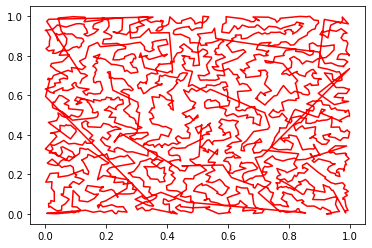

inf

In [94]:
xs = towns[:,0]
ys = towns[:,1]
xs = xs[best_path]
ys = ys[best_path]

plt.plot(xs, ys, 'r')
plt.show()
best_cost

In [ ]:
from random import random

N = 1000

xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

x, y = xs[current], ys[current]
xs[current], ys[current] = inf, inf

dists = []
for i in range(N):
    dists.append((x - xs[i]) ** 2. + (y - ys[i]) ** 2.)
dists.index(min(dists))

In [80]:
from random import random

N = 1000

xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

old_xs = list(xs)
old_ys = list(ys)

current = 3
path = [current]

for j in range(N - 1):
    x, y = xs[current], ys[current]
    xs[current], ys[current] = inf, inf

    dists = []
    for i in range(N):
        dists.append((x - xs[i]) ** 2. + (y - ys[i]) ** 2.)
    current = dists.index(min(dists))
    path.append(current)


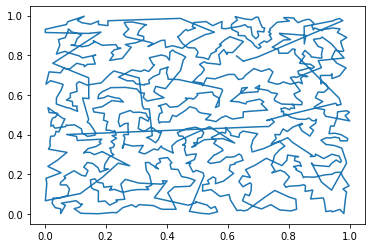

In [82]:
nxs = [old_xs[i] for i in path]
nys = [old_ys[i] for i in path]

plt.plot(nxs, nys)
plt.show()

In [90]:
from random import random
from math import sqrt

N = 400

xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

old_xs = list(xs)
old_ys = list(ys)

best_cost = inf
best_path = []

for current in range(N):

    path = [current]
    cost = 0

    for j in range(N - 1):
        x, y = xs[current], ys[current]
        xs[current], ys[current] = inf, inf

        dists = []
        for i in range(N):
            dists.append((x - xs[i]) ** 2. + (y - ys[i]) ** 2.)
        current = dists.index(min(dists))
        cost += sqrt(min(dists))
        path.append(current)

    if (cost < best_cost):
        best_path = path



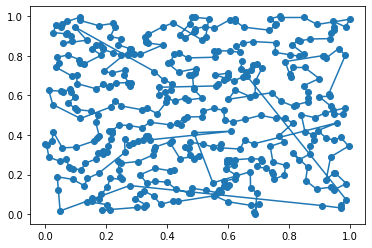

In [91]:
nxs = [old_xs[i] for i in best_path]
nys = [old_ys[i] for i in best_path]

plt.plot(nxs, nys)
plt.scatter(nxs, nys)
plt.show()

In [99]:
from math import pi

N = 1000000
xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

inCircle = [xs[i] ** 2. + ys[i] ** 2. <= 1.0 for i in range(N)]
4 * sum(inCircle) / N, pi

(3.137756, 3.141592653589793)